In [1]:
pip install kagglehub[pandas-datasets]

In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Set the path to the file you'd like to load
file_path = "healthcare_dataset.csv"

# Load the latest version
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "prasad22/healthcare-dataset",file_path)

<ipython-input-7-2fa221d7c663>:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "prasad22/healthcare-dataset",file_path)


In [8]:
df = df.rename(columns={'Name': 'name', 'Age': 'age', 'Gender': 'gender', 'Blood Type': 'blood_type', 'Medical Condition': 'medical_condition', 'Date of Admission': 'date_admission', 'Doctor': 'doctor', 'Hospital': 'hospital', 'Insurance Provider': 'insurance_provider', 'Billing Amount': 'billing_amount', 'Room Number': 'room_number', 'Admission Type': 'admission_type', 'Discharge Date': 'discharge_date', 'Medication': 'medication', 'Test Results': 'test_results'})
df.isnull().sum()

,0
name,0
age,0
gender,0
blood_type,0
medical_condition,0
date_admission,0
doctor,0
hospital,0
insurance_provider,0
billing_amount,0


In [9]:
df.dtypes

,0
name,object
age,int64
gender,object
blood_type,object
medical_condition,object
date_admission,object
doctor,object
hospital,object
insurance_provider,object
billing_amount,float64


In [10]:
df.head()

,name,age,gender,blood_type,medical_condition,date_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [11]:
df['diff_days'] = (pd.to_datetime(df['discharge_date']) - pd.to_datetime(df['date_admission'])).dt.days
df.drop(['discharge_date', 'date_admission'], axis=1, inplace=True)

In [12]:
#from sklearn.preprocessing import LabelEncoder #importando LabelEncoder

# Instanciando o labelencoder
#labelencoder = LabelEncoder()

#df[f"category_gender"] = labelencoder.fit_transform(df["gender"])
#df[f"category_gender"] = labelencoder.fit_transform(df["gender"])

# criando a classificação binária por tipo de categoria
df = pd.get_dummies(df, columns=["gender", "blood_type", "medical_condition", "insurance_provider", "admission_type", "medication", "test_results"], prefix="category")

df

,name,age,doctor,hospital,billing_amount,room_number,diff_days,category_Female,category_Male,category_A+,...,category_Emergency,category_Urgent,category_Aspirin,category_Ibuprofen,category_Lipitor,category_Paracetamol,category_Penicillin,category_Abnormal,category_Inconclusive,category_Normal
0,Bobby JacksOn,30,Matthew Smith,Sons and Miller,18856.281306,328,2,False,True,False,...,False,True,False,False,False,True,False,False,False,True
1,LesLie TErRy,62,Samantha Davies,Kim Inc,33643.327287,265,6,False,True,True,...,True,False,False,True,False,False,False,False,True,False
2,DaNnY sMitH,76,Tiffany Mitchell,Cook PLC,27955.096079,205,15,True,False,False,...,True,False,True,False,False,False,False,False,False,True
3,andrEw waTtS,28,Kevin Wells,"Hernandez Rogers and Vang,",37909.782410,450,30,True,False,False,...,False,False,False,True,False,False,False,True,False,False
4,adrIENNE bEll,43,Kathleen Hanna,White-White,14238.317814,458,20,True,False,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Joshua Jarvis,Jones-Thompson,2650.714952,417,30,True,False,False,...,False,False,False,False,False,False,True,True,False,False
55496,KYle pEREz,61,Taylor Sullivan,Tucker-Moyer,31457.797307,316,9,True,False,False,...,False,False,True,False,False,False,False,False,False,True
55497,HEATher WaNG,38,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",27620.764717,347,28,True,False,False,...,False,True,False,True,False,False,False,True,False,False
55498,JENniFER JOneS,43,Kimberly Curry,"Jackson Todd and Castro,",32451.092358,321,6,False,True,False,...,False,False,False,True,False,False,False,True,False,False


In [13]:
df.columns

Index(['name', 'age', 'doctor', 'hospital', 'billing_amount', 'room_number',
       'diff_days', 'category_Female', 'category_Male', 'category_A+',
       'category_A-', 'category_AB+', 'category_AB-', 'category_B+',
       'category_B-', 'category_O+', 'category_O-', 'category_Arthritis',
       'category_Asthma', 'category_Cancer', 'category_Diabetes',
       'category_Hypertension', 'category_Obesity', 'category_Aetna',
       'category_Blue Cross', 'category_Cigna', 'category_Medicare',
       'category_UnitedHealthcare', 'category_Elective', 'category_Emergency',
       'category_Urgent', 'category_Aspirin', 'category_Ibuprofen',
       'category_Lipitor', 'category_Paracetamol', 'category_Penicillin',
       'category_Abnormal', 'category_Inconclusive', 'category_Normal'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

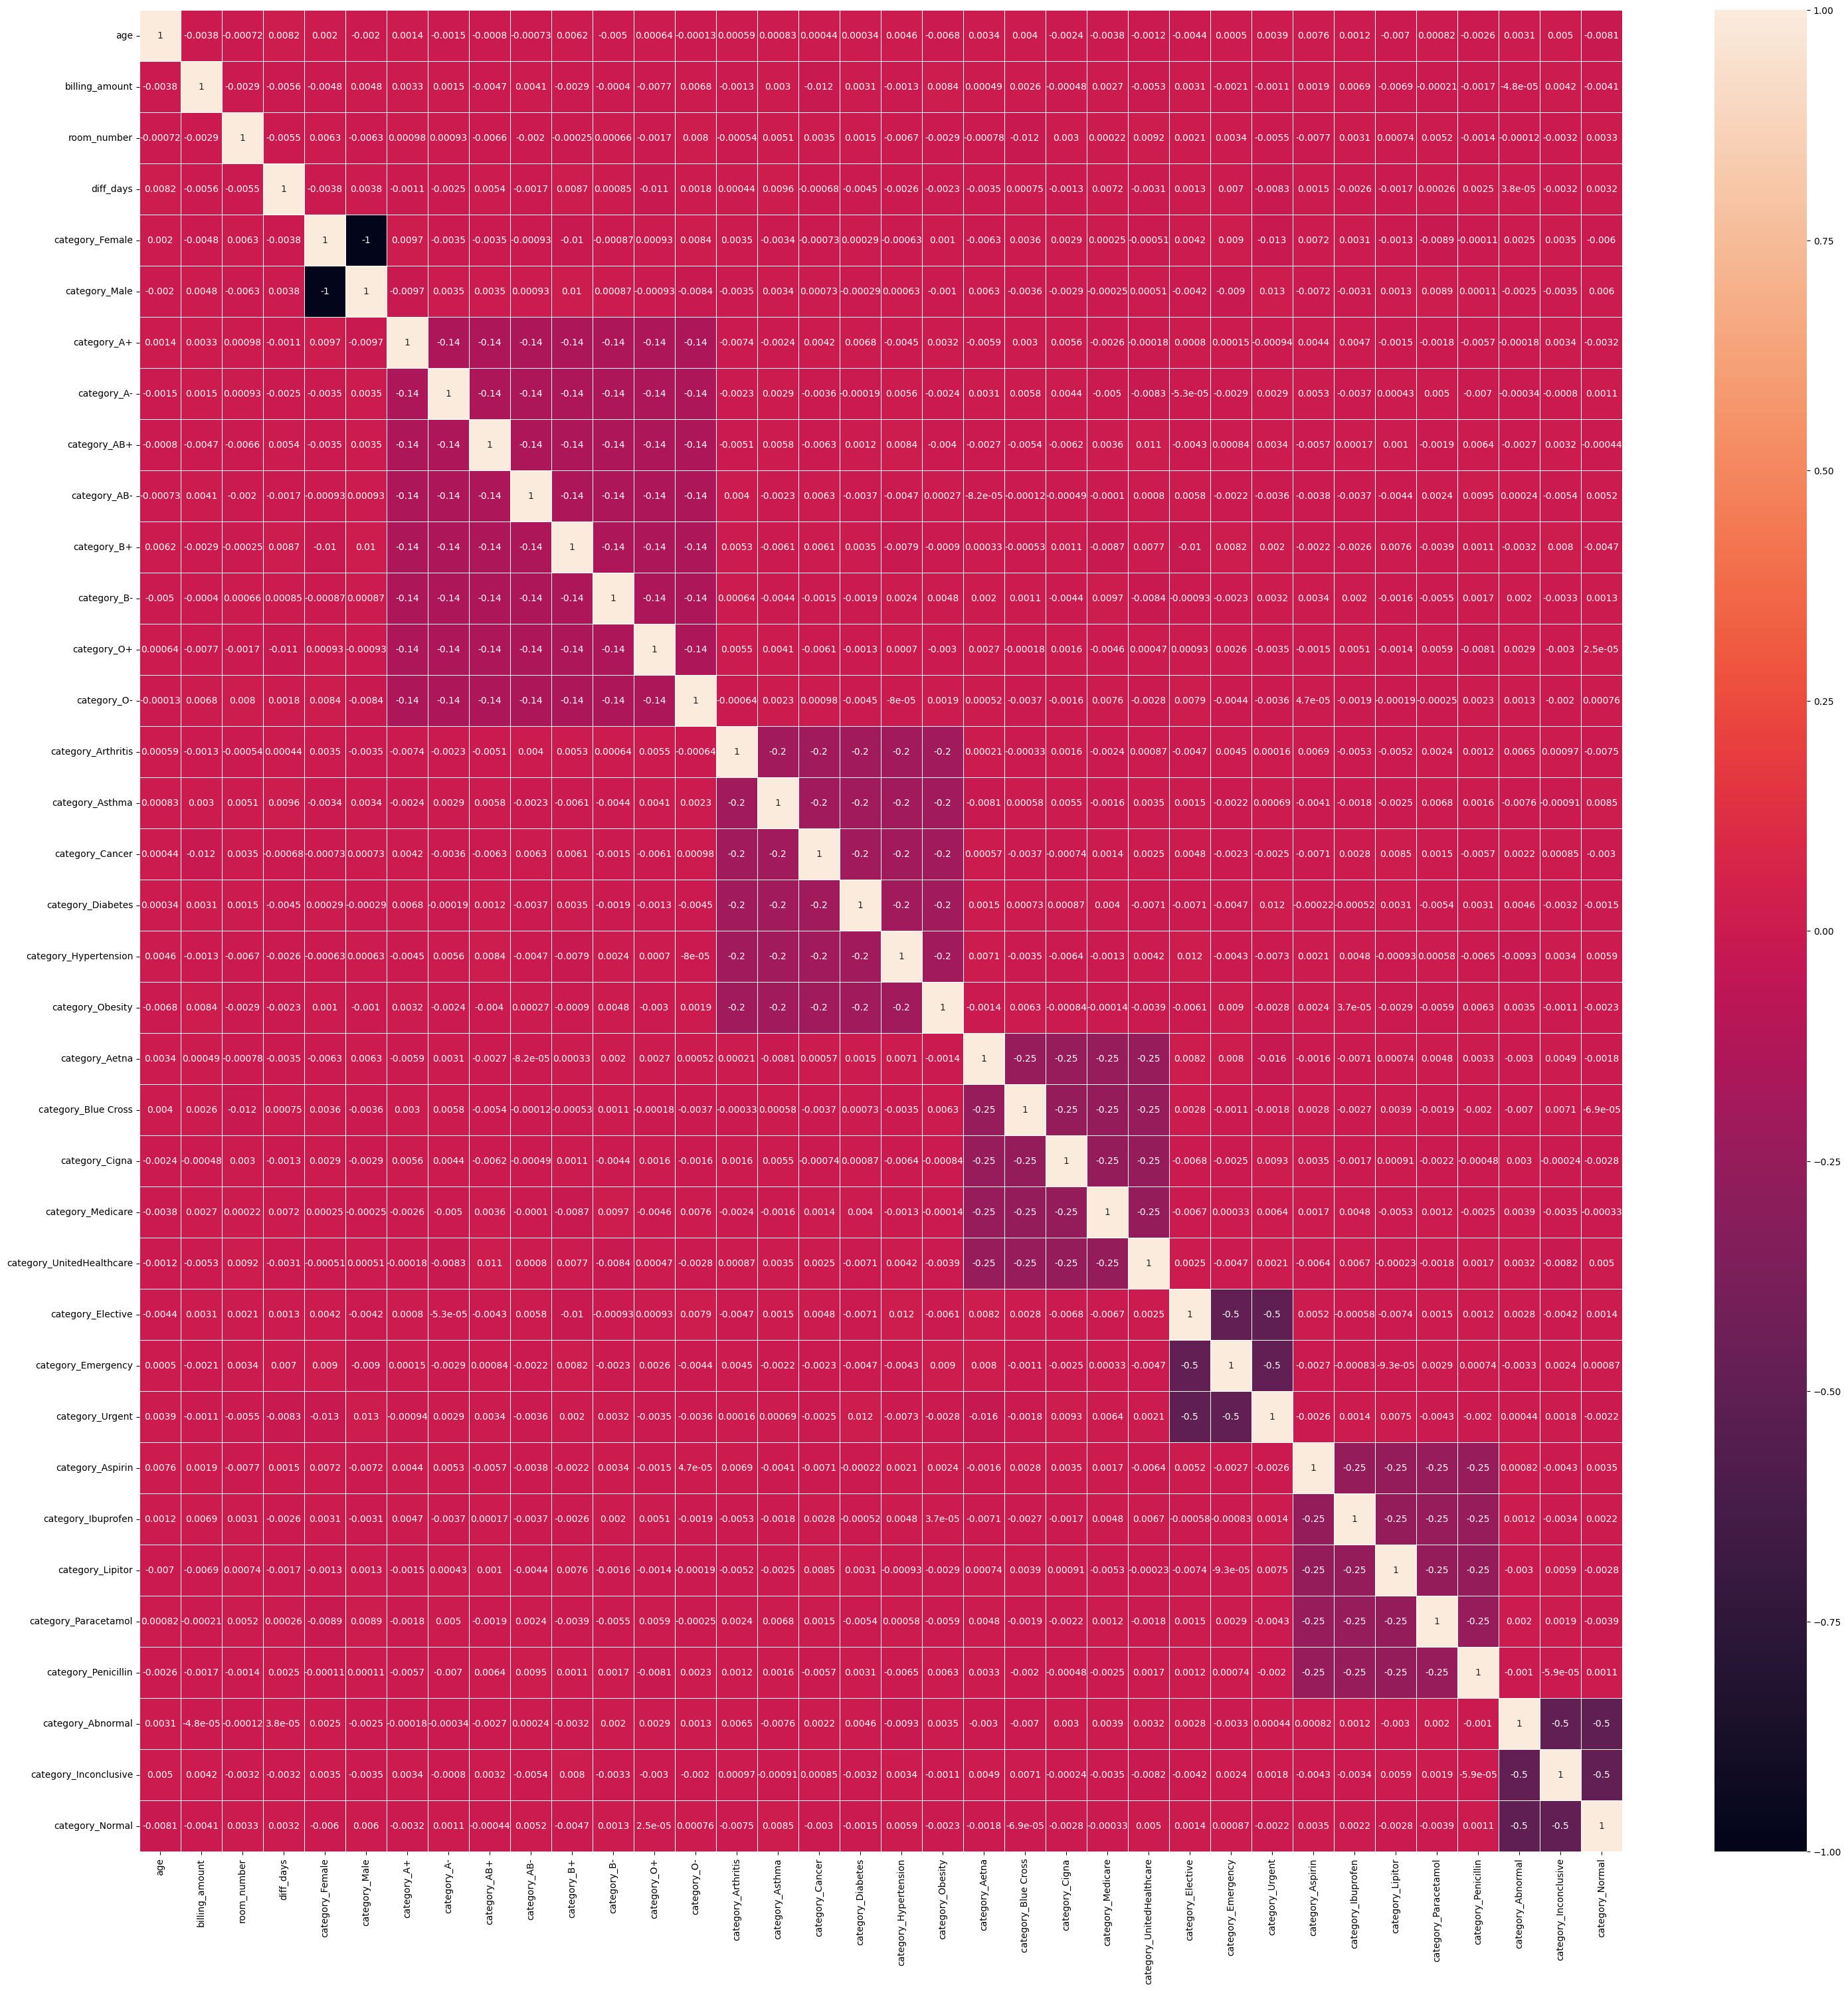

In [17]:
fix, ax = plt.subplots(figsize=(36,36))
sns.heatmap(data=df[['age', 'billing_amount', 'room_number', 'diff_days', 'category_Female', 'category_Male', 'category_A+', 'category_A-', 'category_AB+', 'category_AB-', 'category_B+', 'category_B-', 'category_O+', 'category_O-', 'category_Arthritis', 'category_Asthma', 'category_Cancer', 'category_Diabetes', 'category_Hypertension', 'category_Obesity', 'category_Aetna', 'category_Blue Cross', 'category_Cigna', 'category_Medicare', 'category_UnitedHealthcare', 'category_Elective', 'category_Emergency', 'category_Urgent', 'category_Aspirin', 'category_Ibuprofen', 'category_Lipitor', 'category_Paracetamol', 'category_Penicillin', 'category_Abnormal', 'category_Inconclusive', 'category_Normal']].corr(method = 'pearson'), annot=True, linewidths=0.5, ax=ax)

In [ ]:
df['gender'].value_counts()

,count
gender,
Male,27774
Female,27726
